<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/ITERATION_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-hsgz8426
  Entered build tracker: /tmp/pip-build-tracker-hsgz8426
  Created temporary directory: /tmp/pip-install-92lh25eq
  Created temporary directory: /tmp/pip-ephem-wheel-cache-18zp9i32
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.7 MB/s eta 0:00:00


In [55]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [56]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [57]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-9.7465, -8.3276, -7.0187, -5.7098, -4.4009, -3.1011, -1.8012, -0.5005, 0.2985, 0.6974, 1.0965, 1.4956, 1.8947, 2.2938, 2.6929, 2.9919, 3.2909, 3.5898, 3.8887, 4.1876, 4.4865, 4.7854, 5.0843, 5.3832, 5.6821]


In [58]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):

    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax


    particles = []
    nSize = np.size(Quasi_Random_Sequence_Initialisation)
    for i in range(nSize):
        position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })
    for _ in range(nPop - nSize):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    print(np.size(particles))

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            # Update Velocity
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']

        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
        g_values.append(GlobalBest['Cost'])
        w *= wdamp

        w_values.append(w)
        g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [59]:
# def sphere(x):
#     return sum(x**2)

In [60]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [62]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [63]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [64]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [65]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [66]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [67]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [68]:
costs = []
errors = []

In [69]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [70]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

# # Example of how to access results for a particular problem
# problem_1_results = results[1]
# print("\n\n\nProblem 1 Best Cost:", problem_1_results['BestCost'])
# print("Problem 1 Best Position:", problem_1_results['BestPosition'])
# print("Problem 1 Error:", problem_1_results['Error'])

# # Plotting results for one of the problems (e.g., Problem 1)
# plt.plot(problem_1_results['w_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations - Problem 1')
# plt.show()

# plt.plot(problem_1_results['g_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations - Problem 1')
# plt.show()


100


<ipython-input-61-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-58-f2f9ec8f53c4>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']


Streaming output truncated to the last 5000 lines.
 -4317.89999035 -4317.89999204 -4317.89999204 -4317.89999204
 -4317.89999466 -4317.89999466 -4317.89999524 -4317.8999953
 -4317.8999953  -4317.8999953  -4317.8999953  -4317.8999954
 -4317.89999581 -4317.89999604 -4317.89999645 -4317.89999645
 -4317.89999664 -4317.89999716 -4317.89999716 -4317.8999973
 -4317.89999759 -4317.89999759 -4317.89999759 -4317.89999806
 -4317.89999817 -4317.89999818 -4317.89999818 -4317.89999821
 -4317.8999984  -4317.8999984  -4317.89999867 -4317.89999867
 -4317.8999987  -4317.89999895 -4317.8999991  -4317.89999915
 -4317.89999915 -4317.89999929 -4317.89999929 -4317.89999929
 -4317.89999935 -4317.8999994  -4317.8999994  -4317.8999994
 -4317.8999994  -4317.8999994  -4317.89999948 -4317.89999948
 -4317.89999951 -4317.89999954 -4317.89999954 -4317.89999959
 -4317.89999965 -4317.89999965 -4317.89999966 -4317.89999966
 -4317.89999967 -4317.89999967 -4317.89999969 -4317.89999975
 -4317.89999976 -4317.89999976 -4317.8

In [71]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

4.229150363244116e-11
0.2859447334731158
1.2942646037572558e-05
4.232913397572702e-08
1.2560975630703979
1.3289449884407531
3445.2653297049146
0.004619797243776702
873.692939948688
10159.05504709049
28773.94763205668
9338.675430575799
1369.3264405042728
16755.014836077324
5.875995150125334
682.1000000009708
682.1004622960263
6442.735925475477
13434.142424721123
4.340741318272862
5.000085732190541
116610.44191661896
43.23581164396886
171.5308850190477





Problem 1 Best Cost: [ 6.44573144e+04  4.63253984e+04  3.72564483e+04  3.37632499e+04
  2.19900274e+04  1.56603245e+04  1.24200194e+04  8.52796872e+03
  8.36449123e+03  5.39137607e+03  3.16105289e+03  2.08012267e+03
  1.65021120e+03  1.45739212e+03  8.15875346e+02  6.00658567e+02
  3.78709232e+02  3.78709232e+02 -3.17696501e+01 -3.17696501e+01
 -7.81618214e+01 -1.49564960e+02 -3.82203834e+02 -5.35615708e+02
 -7.22494749e+02 -7.22494749e+02 -7.45423780e+02 -7.45423780e+02
 -8.31609632e+02 -8.31609632e+02 -8.31609632e+02 -8.31609632e+02
 -8.75243606e+02 -8.75243606e+02 -8.75243606e+02 -9.49997582e+02
 -9.49997582e+02 -9.62873194e+02 -9.80326507e+02 -9.80326507e+02
 -9.80326507e+02 -9.94854849e+02 -9.94854849e+02 -9.94854849e+02
 -9.94854849e+02 -9.97834890e+02 -9.97834890e+02 -9.97834890e+02
 -1.00096365e+03 -1.00096365e+03 -1.01200092e+03 -1.01200092e+03
 -1.02579371e+03 -1.03865331e+03 -1.03865331e+03 -1.04877498e+03
 -1.05130334e+03 -1.05606606e+03 -1.05702486e+03 -1.05702486e+03
 

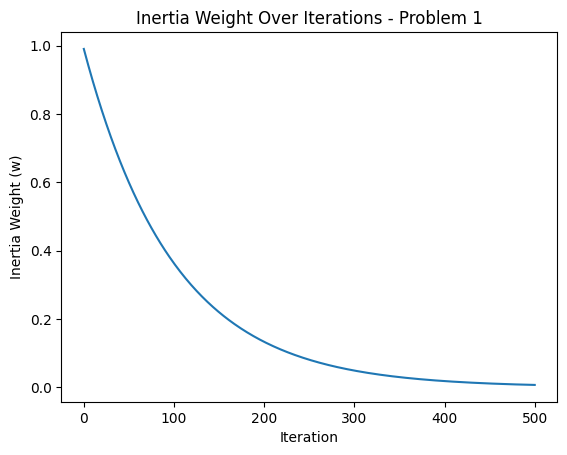

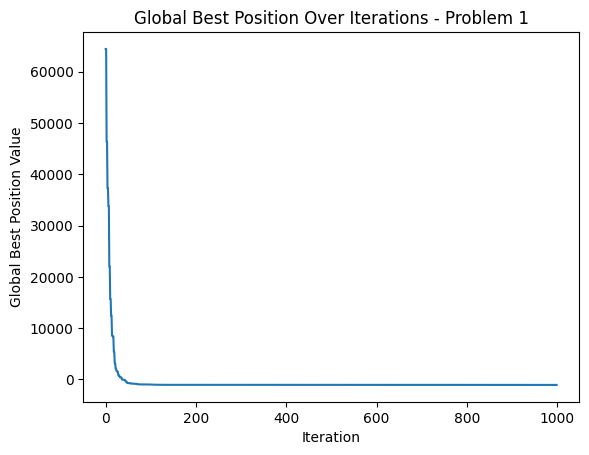




Problem 2 Best Cost: [-701.39701298 -701.42243799 -701.44491579 -701.4726159  -701.50618637
 -701.52509075 -701.53904019 -701.55297888 -701.56666328 -701.59237869
 -701.59763775 -701.59763775 -701.62799916 -701.63836689 -701.63848744
 -701.66169215 -701.66545374 -701.66604574 -701.68396902 -701.69490211
 -701.72051422 -701.72837876 -701.7417924  -701.7417924  -701.7458327
 -701.75323974 -701.77328064 -701.77328064 -701.7963782  -701.80127754
 -701.80127754 -701.80127754 -701.80127754 -701.80452937 -701.81659463
 -701.81659463 -701.81659463 -701.81659463 -701.82952348 -701.82952348
 -701.83393062 -701.84214795 -701.85214354 -701.85796261 -701.85796261
 -701.86850384 -701.86850384 -701.87213824 -701.87854996 -701.88784872
 -701.90464058 -701.90464058 -701.92272041 -701.92272041 -701.92272041
 -701.95419286 -701.95419286 -701.96160109 -701.96160109 -701.96160109
 -701.96160109 -701.96340065 -701.97060994 -701.97489646 -701.97621161
 -701.97621161 -701.97822116 -701.98978405 -702.003675

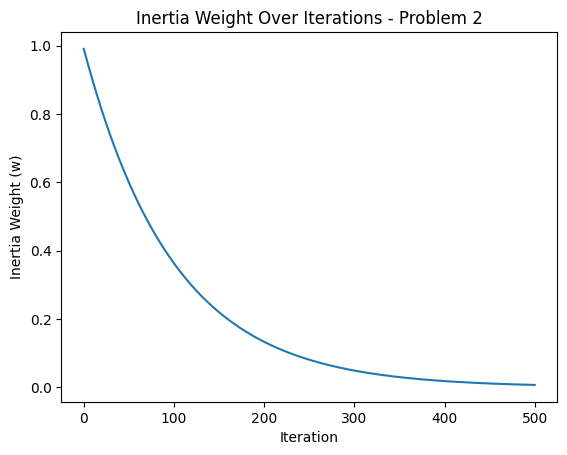

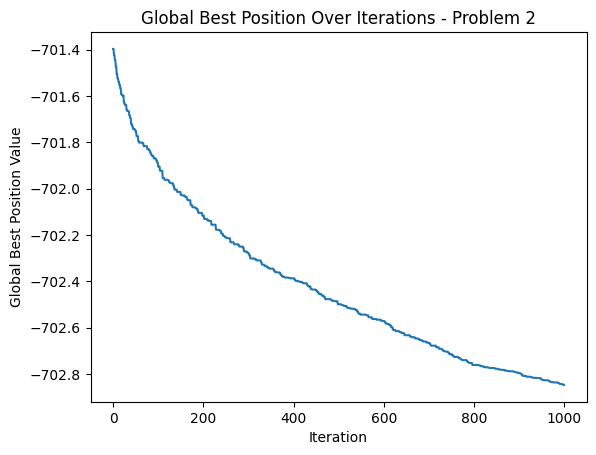




Problem 3 Best Cost: [ 3.09302401e+10  2.46802197e+10  1.99896587e+10  1.56117486e+10
  1.15503460e+10  8.39988208e+09  8.33643125e+09  6.64673939e+09
  5.36629283e+09  4.52536351e+09  3.62090697e+09  2.63674981e+09
  1.76613003e+09  1.45409394e+09  1.27472917e+09  1.20812060e+09
  1.01027956e+09  9.72338473e+08  9.72338473e+08  9.60647396e+08
  8.22792667e+08  6.55396255e+08  6.55396255e+08  5.16958463e+08
  5.10598954e+08  5.08501991e+08  4.77675087e+08  4.62167228e+08
  4.62167228e+08  4.62167228e+08  3.94078452e+08  3.53156087e+08
  3.53156087e+08  2.97585836e+08  2.81887679e+08  2.57284828e+08
  2.27633850e+08  2.04125491e+08  2.04125491e+08  2.04125491e+08
  1.95118095e+08  1.64439677e+08  1.64439677e+08  1.64439677e+08
  1.18571218e+08  1.18571218e+08  1.18571218e+08  1.14219253e+08
  9.02229436e+07  9.02229436e+07  8.62546042e+07  8.62546042e+07
  8.62546042e+07  7.58618362e+07  6.41188934e+07  5.19512976e+07
  5.19512976e+07  5.19512976e+07  4.68349366e+07  3.79248686e+07
 

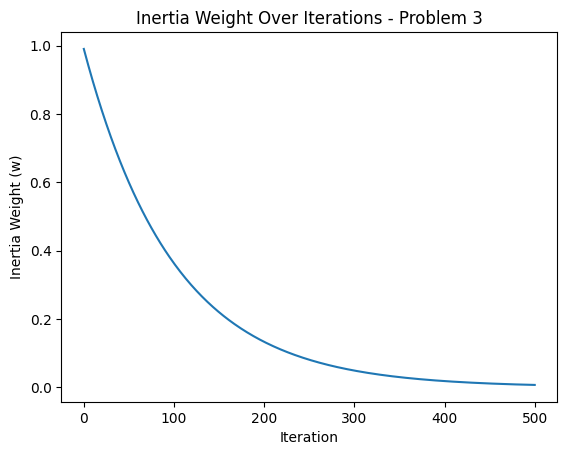

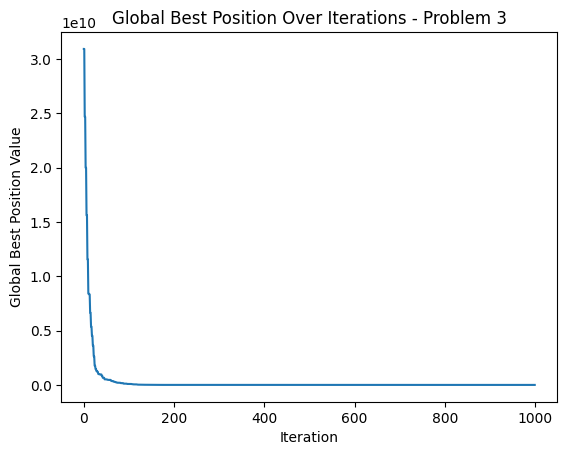




Problem 4 Best Cost: [ 3.31923440e+05  2.77478783e+05  2.57647664e+05  1.91966586e+05
  1.42581534e+05  8.92335212e+04  5.74704150e+04  5.08769978e+04
  4.63796879e+04  4.31910717e+04  3.12012370e+04  2.01921836e+04
  2.01921836e+04  1.79849485e+04  1.62086305e+04  1.12513737e+04
  1.12513737e+04  9.10962611e+03  8.04044111e+03  7.70516587e+03
  5.96763800e+03  5.96763800e+03  5.67421772e+03  5.66261366e+03
  4.42026892e+03  3.53579199e+03  3.45147958e+03  3.36528684e+03
  2.11277113e+03  2.11277113e+03  2.11277113e+03  2.11277113e+03
  2.11277113e+03  1.71364206e+03  1.71364206e+03  1.22923528e+03
  1.04897652e+03  9.08381967e+02  8.86860493e+02  8.86860493e+02
  2.93993333e+02  2.93993333e+02  2.93993333e+02  2.93993333e+02
  2.54221007e+02  2.42292996e+02  1.84788487e+02  1.84788487e+02
  1.84788487e+02  1.07382880e+02  1.07382880e+02  1.07382880e+02
  1.07382880e+02 -1.09208236e+00 -1.09208236e+00 -9.78732307e+01
 -9.78732307e+01 -9.78732307e+01 -1.27163170e+02 -1.27163170e+02
 

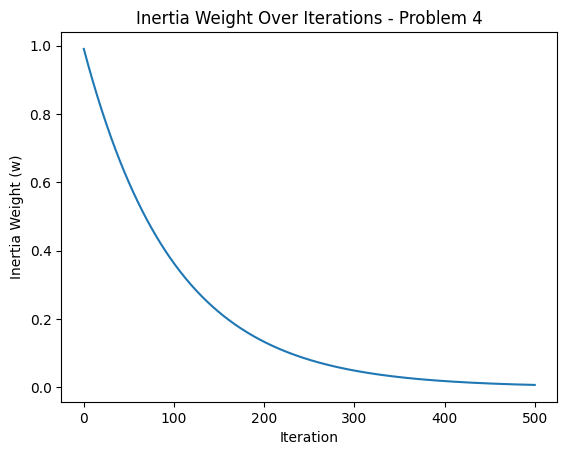

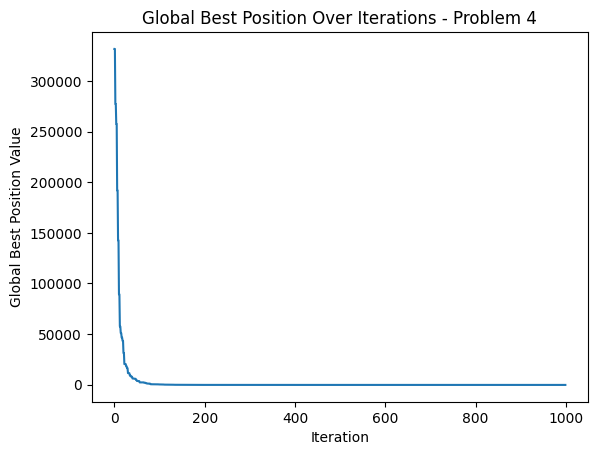




Problem 5 Best Cost: [-334.16994207 -334.21470749 -334.24362557 -334.29375829 -334.34817775
 -334.4221378  -334.48493289 -334.50370932 -334.51637852 -334.57633938
 -334.6039851  -334.6272852  -334.66086015 -334.67111055 -334.73833288
 -334.73833288 -334.74147885 -334.74615527 -334.75017066 -334.80282821
 -334.80282821 -334.80282821 -334.80282821 -334.80507473 -334.82718753
 -334.85933447 -334.85933447 -334.85933447 -334.85933447 -334.86733588
 -334.89171413 -334.89171413 -334.90865431 -334.92125444 -334.92125444
 -334.9330146  -334.95507141 -334.95507141 -334.95507141 -334.96474804
 -334.96474804 -334.96474804 -334.96879774 -334.97438136 -335.00683487
 -335.0326877  -335.03618703 -335.03618703 -335.03618703 -335.03618703
 -335.03618703 -335.04638693 -335.05200366 -335.05200366 -335.05200366
 -335.05826376 -335.09787758 -335.10040727 -335.13022325 -335.13022325
 -335.16476179 -335.16476179 -335.16476179 -335.17046888 -335.19749957
 -335.20217757 -335.21793748 -335.21793748 -335.21793

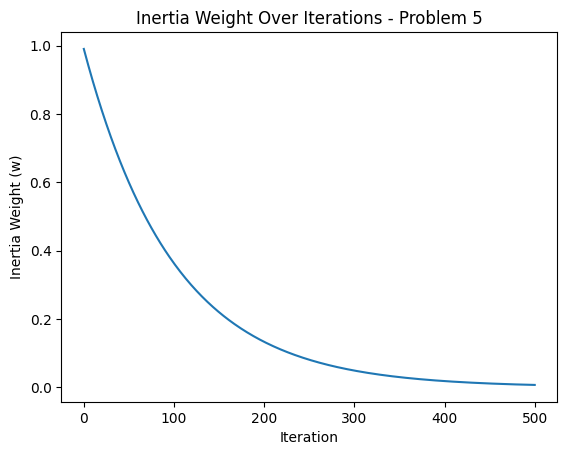

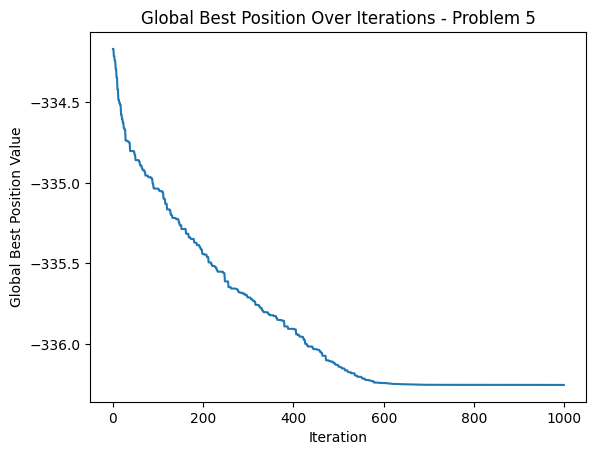




Problem 6 Best Cost: [-183.53599074 -183.60224985 -183.66557531 -183.69716488 -183.77559587
 -183.7816693  -183.82480353 -183.83399515 -183.86222605 -183.96068409
 -183.96068409 -183.96875332 -184.00478404 -184.00478404 -184.01708717
 -184.04510288 -184.05238549 -184.0529926  -184.06034116 -184.07685995
 -184.10297065 -184.11982086 -184.11982086 -184.1234725  -184.12766629
 -184.14698936 -184.14732175 -184.19311276 -184.19311276 -184.19416522
 -184.20285196 -184.20285196 -184.2112492  -184.24916242 -184.24916242
 -184.24916242 -184.2523273  -184.27174972 -184.27174972 -184.28040526
 -184.28040526 -184.28475508 -184.28475508 -184.28788812 -184.31883628
 -184.33856228 -184.34268449 -184.36874459 -184.36874459 -184.36874459
 -184.38091599 -184.38091599 -184.38091599 -184.38091599 -184.382744
 -184.382744   -184.382744   -184.4205696  -184.4205696  -184.4205696
 -184.4205696  -184.4205696  -184.42683253 -184.43696158 -184.43985968
 -184.43985968 -184.44099608 -184.4456058  -184.4456058 

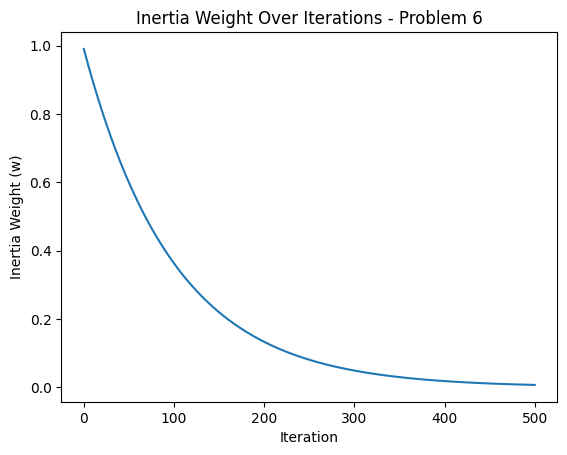

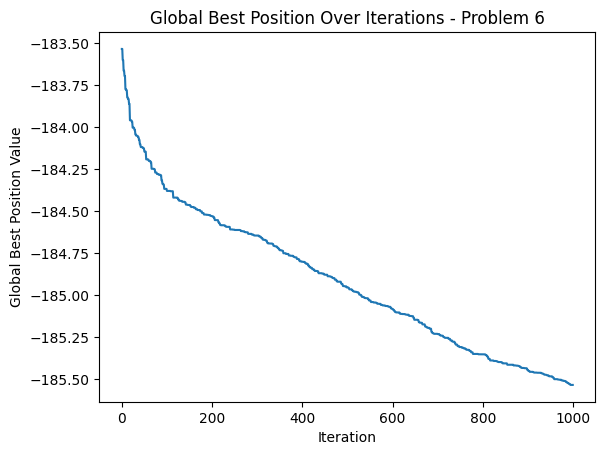




Problem 7 Best Cost: [55834.43057784 55834.43057784 42646.56634243 36324.21722107
 28273.31607514 18609.75702794 18609.75702794 17504.15666082
 17504.15666082 16304.02384393 16304.02384393 15670.73436896
 15670.73436896 15670.73436896 14882.19940732 14882.19940732
 14882.19940732 14817.82249853 13679.50508007 11367.9052234
 10082.47735738 10082.47735738 10082.47735738 10082.47735738
 10082.47735738 10082.47735738 10082.47735738 10082.47735738
 10076.12725471  7679.75150671  7679.75150671  7679.75150671
  7679.75150671  7679.75150671  7679.75150671  7651.19027174
  7651.19027174  7651.19027174  7428.48150607  7428.48150607
  6953.10271983  6953.10271983  6953.10271983  6826.43456871
  6826.43456871  6826.43456871  6521.98176594  6521.98176594
  6212.66340638  6212.66340638  6165.3310453   5868.28291974
  5868.28291974  5865.79205214  5580.90721981  5580.90721981
  5577.33981408  5420.24569832  5389.80001435  5389.80001435
  5335.45523901  5335.45523901  5335.45523901  5335.45523901
 

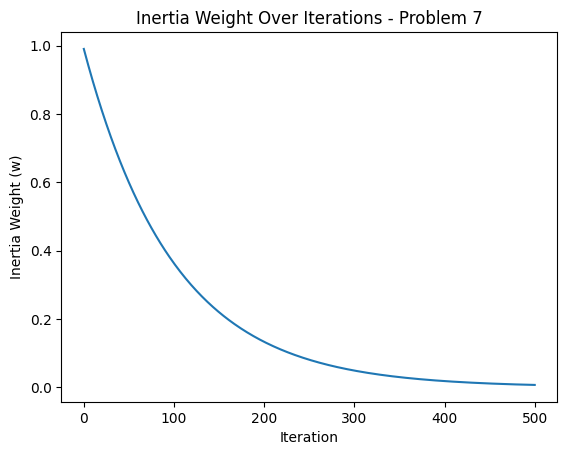

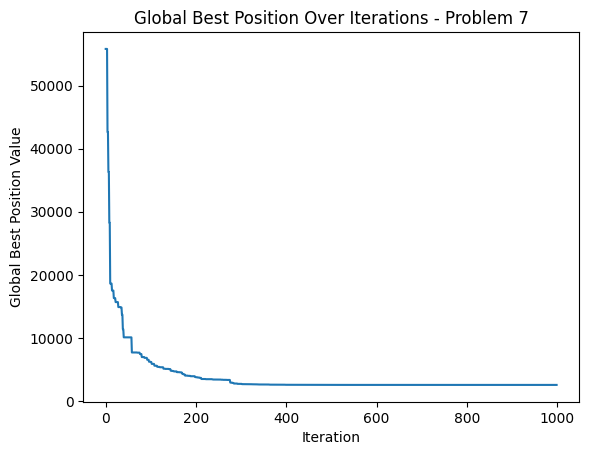




Problem 8 Best Cost: [ 5.31969490e+04  5.10003480e+04  5.10003480e+04  4.34770296e+04
  3.01579958e+04  2.95860541e+04  2.62405022e+04  2.44019237e+04
  2.40389398e+04  2.40389398e+04  2.40389398e+04  2.40389398e+04
  2.40389398e+04  2.33191422e+04  2.12817564e+04  2.12817564e+04
  2.08594095e+04  2.04917995e+04  2.01359035e+04  1.28046867e+04
  8.97400155e+03  8.97400155e+03  8.55346754e+03  7.21029397e+03
  7.21029397e+03  7.21029397e+03  7.21029397e+03  6.94131098e+03
  5.21708585e+03  5.21708585e+03  5.12092146e+03  5.12092146e+03
  5.12092146e+03  4.24998549e+03  3.37437926e+03  3.37437926e+03
  3.37437926e+03  3.37437926e+03  3.37437926e+03  3.37437926e+03
  3.28942612e+03  2.94229390e+03  2.94229390e+03  1.82823090e+03
  1.52792377e+03  1.52792377e+03  1.52792377e+03  1.52792377e+03
  1.52792377e+03  1.52792377e+03  1.21739306e+03  1.21739306e+03
  1.21739306e+03  1.21739306e+03  7.28210068e+02  7.28210068e+02
  4.13588852e+02  4.13588852e+02  4.13588852e+02  2.37829656e+02
 

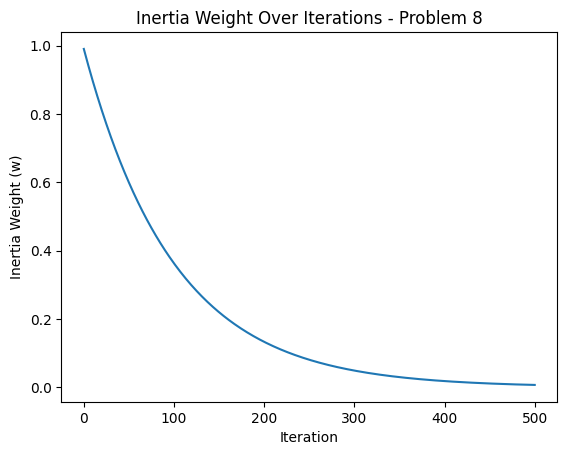

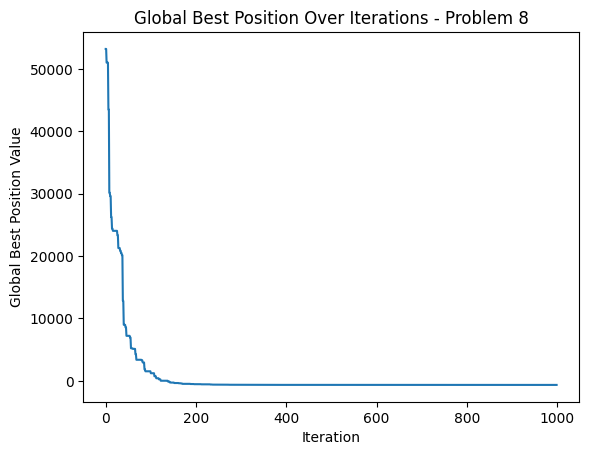




Problem 9 Best Cost: [ 9.58663716e+04  9.58663716e+04  6.37425523e+04  6.37425523e+04
  6.37425523e+04  6.37425523e+04  6.37425523e+04  6.37425523e+04
  6.37425523e+04  5.99712493e+04  5.99712493e+04  5.99712493e+04
  5.99712493e+04  5.99644915e+04  3.48137419e+04  3.48137419e+04
  3.08560866e+04  2.29974472e+04  2.29974472e+04  2.29974472e+04
  2.29974472e+04  2.29974472e+04  2.29974472e+04  2.29974472e+04
  2.29974472e+04  2.29974472e+04  2.29974472e+04  2.29974472e+04
  2.29974472e+04  2.29974472e+04  2.29974472e+04  2.29974472e+04
  2.07626533e+04  2.07626533e+04  2.07626533e+04  2.07626533e+04
  1.52535227e+04  1.52535227e+04  1.52535227e+04  1.52535227e+04
  1.52535227e+04  1.52535227e+04  1.52535227e+04  1.26329102e+04
  1.26329102e+04  1.02403925e+04  1.02403925e+04  1.00487185e+04
  1.00487185e+04  1.00487185e+04  1.00487185e+04  1.00487185e+04
  1.00487185e+04  6.71171576e+03  6.71171576e+03  6.71171576e+03
  6.71171576e+03  6.71171576e+03  6.71171576e+03  3.51131180e+03
 

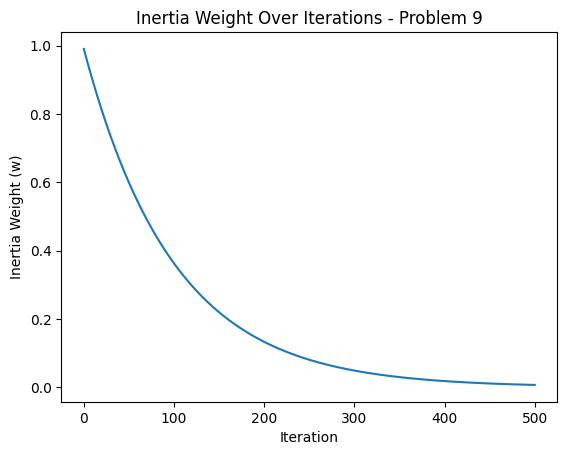

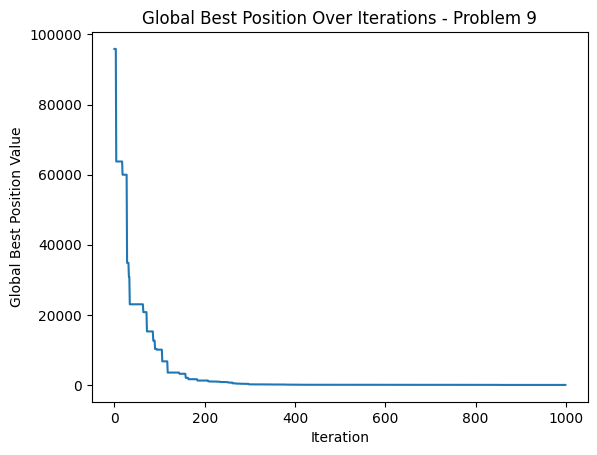




Problem 10 Best Cost: [37820.07946461 31741.708268   29548.17943955 29548.17943955
 29548.17943955 25227.81134879 25194.85125261 25194.85125261
 24305.68519148 21772.81111839 21772.81111839 20494.25073318
 18207.24638673 17454.82918785 17454.82918785 17454.82918785
 17006.19915562 16580.4845268  16130.51752009 16130.51752009
 16130.51752009 16130.51752009 16095.84955446 15690.25936653
 15690.25936653 14605.34284661 14605.34284661 14605.34284661
 14605.34284661 14605.34284661 14605.34284661 14605.34284661
 14605.34284661 14605.34284661 14150.38306854 14150.38306854
 14150.38306854 14150.38306854 14150.38306854 14134.9066263
 12897.3091745  12897.3091745  12897.3091745  12897.3091745
 12422.24447673 12422.24447673 12422.24447673 12422.24447673
 12422.24447673 12422.24447673 12272.69629531 12135.35200395
 11620.11297241 11620.11297241 11620.11297241 11620.11297241
 11620.11297241 11620.11297241 11500.36082609 11500.36082609
 11500.36082609 11500.36082609 11495.22602464 10998.15213327
 

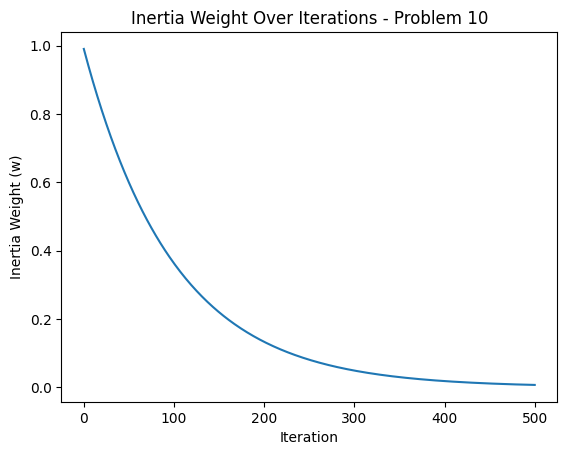

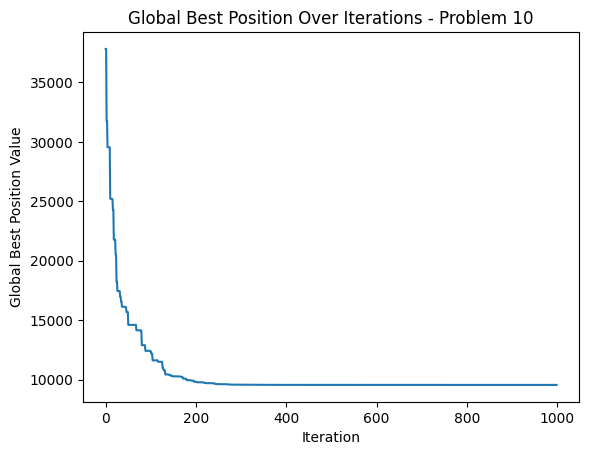




Problem 11 Best Cost: [57795.17885373 56143.69514039 50887.04968944 47247.94314884
 44217.68389396 44217.68389396 42399.52696887 42399.52696887
 42399.52696887 42399.52696887 42399.52696887 37308.79613837
 37308.79613837 37308.79613837 37308.79613837 37308.79613837
 37308.79613837 37308.79613837 37308.79613837 37308.79613837
 37308.79613837 37308.79613837 37308.79613837 37308.79613837
 37308.79613837 37308.79613837 36617.86793205 36617.86793205
 35222.8190212  34793.37745151 34793.37745151 34793.37745151
 34793.37745151 34793.37745151 34793.37745151 34793.37745151
 34793.37745151 33942.81074646 33942.81074646 33246.98198947
 33246.98198947 33246.98198947 33246.98198947 33246.98198947
 33246.98198947 33246.98198947 33246.98198947 32957.0690677
 32772.75525523 32772.75525523 31842.01599261 31842.01599261
 31506.935601   31506.935601   31506.935601   31098.09628842
 30720.13072675 30720.13072675 30617.70196402 30513.64882898
 30306.59048471 30306.59048471 30306.59048471 30306.59048471


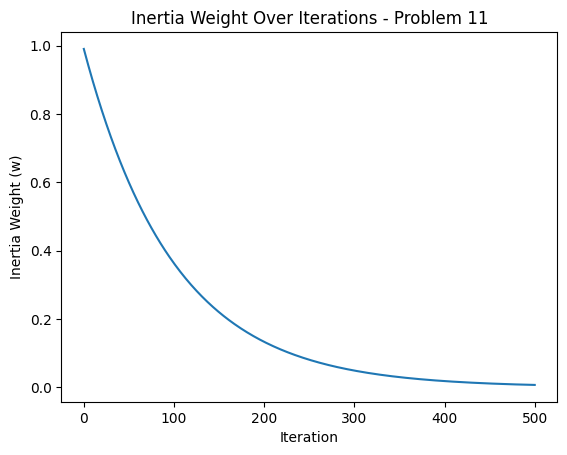

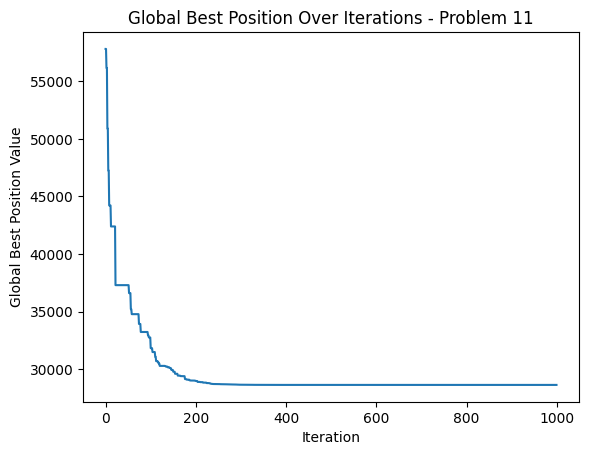




Problem 12 Best Cost: [47128.36224647 47128.36224647 29018.71553982 28354.91484904
 28354.91484904 28354.91484904 28354.91484904 27271.46547477
 27271.46547477 25275.61413226 21828.18561582 21828.18561582
 20443.3529323  20443.3529323  20443.3529323  20443.3529323
 20443.3529323  18301.97839879 14599.54735082 14599.54735082
 14599.54735082 14599.54735082 14599.54735082 14479.76898666
 14479.76898666 14479.76898666 14479.76898666 14479.76898666
 13468.34438011 13461.59151448 13461.59151448 12808.11376163
 12808.11376163 12342.67125902 12342.67125902 11831.38813248
 11831.38813248 11831.38813248 11831.38813248 11793.09867903
 11759.09260275 11443.5660559  11443.5660559  11237.61462706
 11040.92621014 11040.92621014 10525.95368917 10525.95368917
 10437.86322152  9985.16497757  9985.16497757  9985.16497757
  9780.25725804  9780.25725804  9780.25725804  9685.16698751
  9685.16698751  9685.16698751  9458.33944     9104.70734556
  9104.70734556  9104.70734556  8990.89946336  8943.06036129


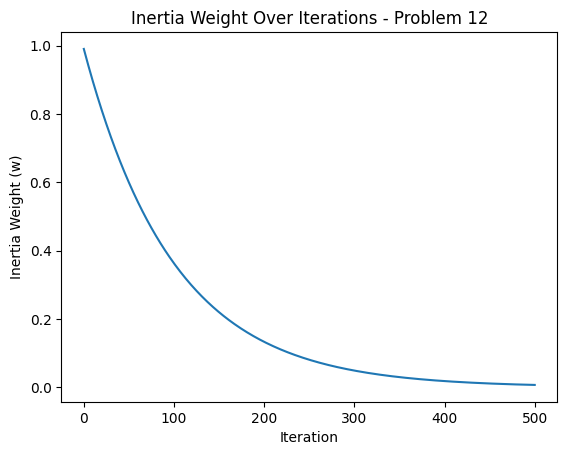

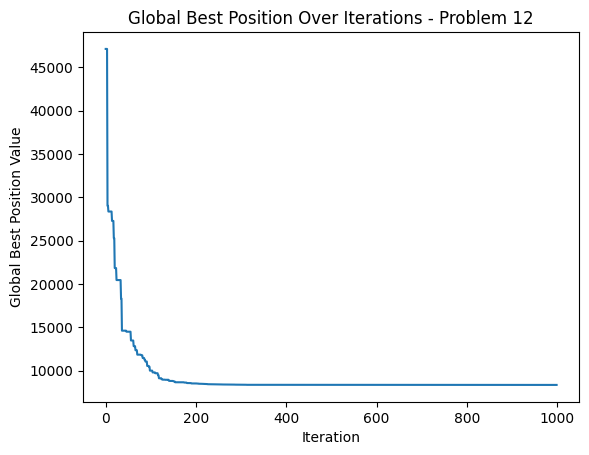




Problem 13 Best Cost: [175351.51450493 175351.51450493  90603.80562143  90603.80562143
  90603.80562143  90603.80562143  90603.80562143  90603.80562143
  90603.80562143  90603.80562143  90603.80562143  90603.80562143
  90603.80562143  90603.80562143  90603.80562143  90603.80562143
  90603.80562143  90603.80562143  90603.80562143  90603.80562143
  90603.80562143  90603.80562143  90603.80562143  90603.80562143
  90603.80562143  90603.80562143  90603.80562143  90603.80562143
  90603.80562143  90603.80562143  74959.57226131  74959.57226131
  74959.57226131  74959.57226131  74959.57226131  74959.57226131
  74959.57226131  74959.57226131  74959.57226131  74959.57226131
  74959.57226131  74959.57226131  74959.57226131  74959.57226131
  74959.57226131  74959.57226131  74959.57226131  74959.57226131
  74959.57226131  74959.57226131  74222.35944514  74222.35944514
  74222.35944514  69246.99941595  69246.99941595  69246.99941595
  69246.99941595  69246.99941595  69246.99941595  69246.99941595


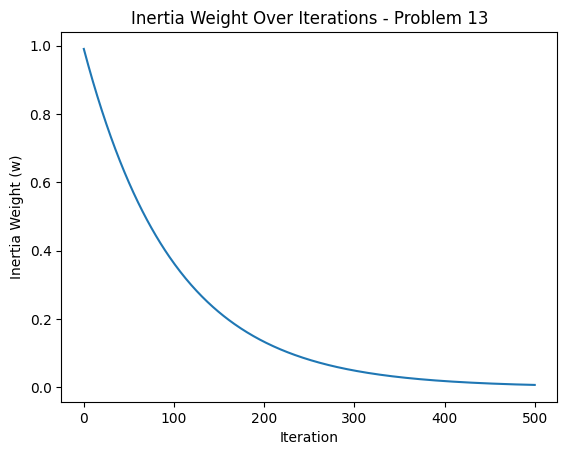

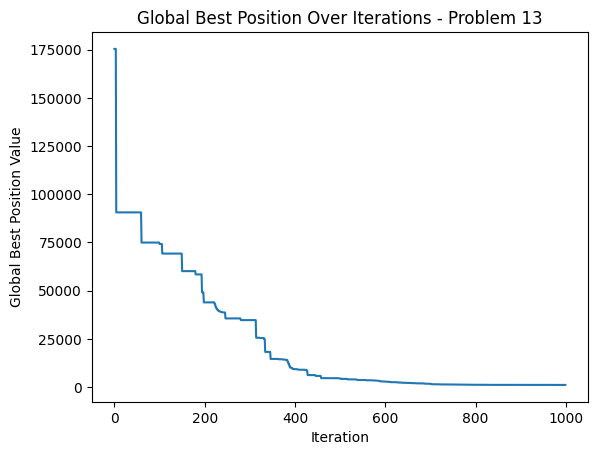




Problem 14 Best Cost: [24547.56696379 24060.89965194 22836.90542202 22726.39012032
 22726.39012032 21732.25377089 21732.25377089 21667.85903679
 21667.85903679 21667.85903679 21667.85903679 21404.74631337
 21404.74631337 21404.74631337 21404.74631337 21339.04246496
 21339.04246496 21339.04246496 21066.25209166 21066.25209166
 21066.25209166 20884.29631534 20788.08382125 20742.88173093
 20742.88173093 20728.56510185 20728.56510185 20713.98349618
 20708.87206683 20708.79375802 20694.70919493 20694.70919493
 20638.04666245 19107.62689971 19107.62689971 19107.62689971
 19107.62689971 18439.45155769 18439.45155769 18439.45155769
 18439.45155769 18439.45155769 18439.45155769 18439.45155769
 18439.45155769 18087.44253786 18087.44253786 18087.44253786
 18087.44253786 17924.60483708 17924.60483708 17924.60483708
 17877.64635382 17877.64635382 17877.64635382 17747.02165354
 17747.02165354 17747.02165354 17747.02165354 17654.29513509
 17654.29513509 17578.38504619 17578.38504619 17578.38504619

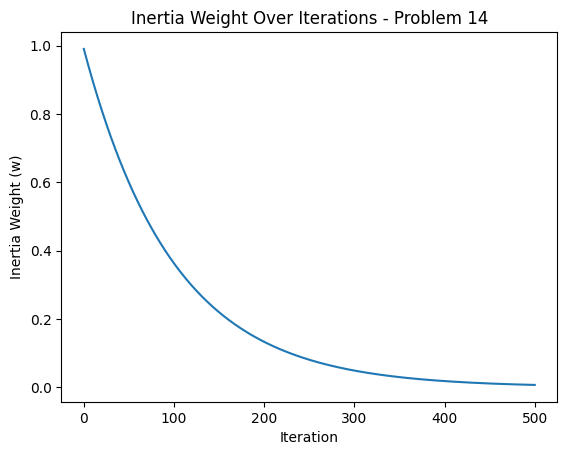

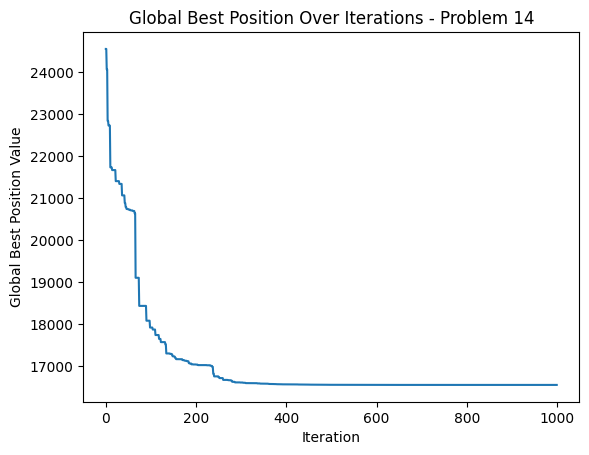




Problem 15 Best Cost: [-224.16775894 -224.97407949 -225.37421352 -225.73841154 -225.73841154
 -225.73841154 -225.73841154 -226.0589078  -226.0589078  -226.66607887
 -226.66607887 -226.66607887 -226.66607887 -226.66607887 -226.66607887
 -226.66607887 -226.66607887 -226.81680839 -226.81680839 -226.81680839
 -226.81680839 -226.81680839 -227.0089983  -227.1913658  -227.38944136
 -227.38944136 -227.38944136 -227.38944136 -227.38944136 -227.38944136
 -227.39550746 -227.39550746 -227.49516507 -227.49516507 -227.49516507
 -227.49516507 -227.49516507 -227.49516507 -227.49516507 -227.49516507
 -227.49516507 -227.49516507 -227.49516507 -227.49516507 -227.65374212
 -227.65374212 -227.65374212 -227.65374212 -227.65374212 -227.65374212
 -227.65374212 -227.65374212 -227.88029114 -227.88029114 -227.88029114
 -227.88029114 -227.88029114 -227.88029114 -227.88029114 -227.88029114
 -227.88029114 -227.88029114 -227.93555714 -227.97913268 -227.97913268
 -227.97913268 -227.97913268 -227.97913268 -227.9791

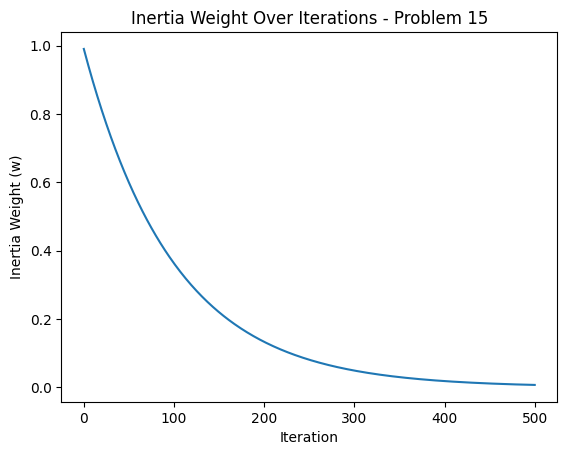

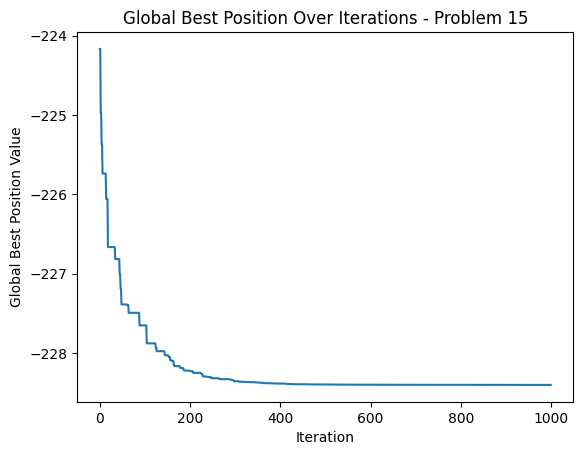




Problem 16 Best Cost: [46179.93014981 37550.24107057 29062.58754983 24065.66844398
 16819.86188018  8845.22445277  6580.99113383  5942.15727936
  3714.10333972  1076.50049738  1076.50049738  -421.10527457
 -1210.10965117 -2597.19246364 -2597.19246364 -2831.78321082
 -2831.78321082 -2831.78321082 -2979.0740526  -3159.44748281
 -3219.40366844 -3472.47668856 -3496.10402304 -3547.1477465
 -3630.58846709 -3849.72374305 -3849.72374305 -3849.72374305
 -3849.72374305 -3870.58095188 -3938.54874035 -4000.36585897
 -4000.36585897 -4000.36585897 -4000.36585897 -4024.70067532
 -4024.70067532 -4050.91475434 -4091.41130879 -4147.80605769
 -4147.80605769 -4147.80605769 -4155.48515259 -4167.72273413
 -4167.72273413 -4177.149942   -4190.43649531 -4194.96564148
 -4194.96564148 -4212.84694848 -4221.74230518 -4221.74230518
 -4242.29483986 -4246.07143214 -4246.07143214 -4246.07143214
 -4246.07143214 -4250.72550582 -4250.72550582 -4250.72550582
 -4250.72550582 -4254.02006083 -4255.16765844 -4262.94843415


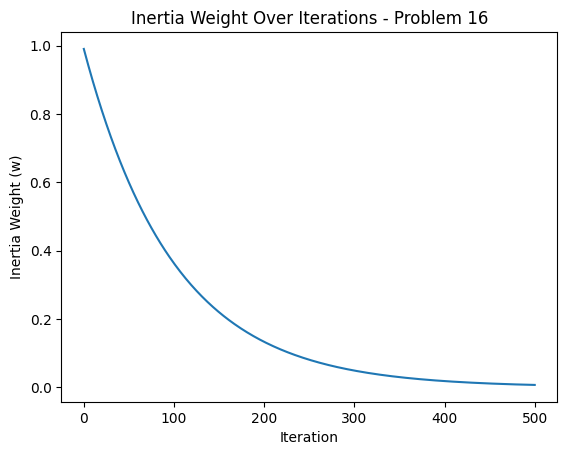

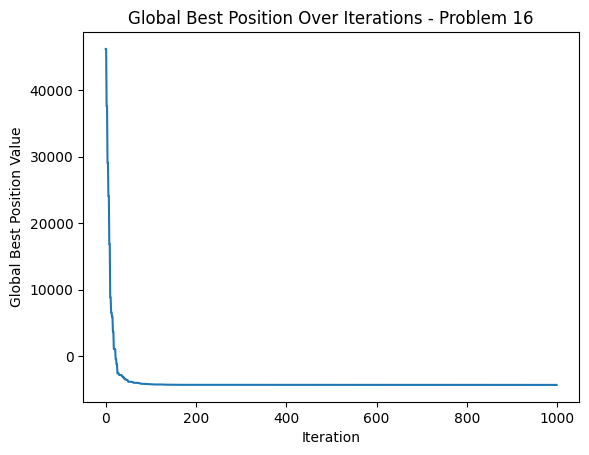




Problem 17 Best Cost: [ 2.82835508e+06  2.44493380e+06  1.87163020e+06  1.44744736e+06
  1.12762664e+06  8.00641591e+05  6.84418815e+05  6.21936727e+05
  5.74946344e+05  3.25071897e+05  1.90172455e+05  1.67522122e+05
  1.07777674e+05  8.07800120e+04  8.07800120e+04  7.77086450e+04
  7.77086450e+04  7.55573809e+04  7.02136327e+04  3.90452559e+04
  2.53447129e+04  2.53447129e+04  2.53447129e+04  2.37978241e+04
  2.37978241e+04  2.35434181e+04  2.30111338e+04  2.27028657e+04
  1.89594635e+04  1.89594635e+04  1.60836845e+04  1.53053825e+04
  1.25464486e+04  1.09520701e+04  1.09520701e+04  1.09520701e+04
  1.09520701e+04  1.06419915e+04  7.87606886e+03  7.87606886e+03
  7.39406908e+03  4.10417335e+03  4.10417335e+03  4.10417335e+03
  4.10417335e+03  3.48616017e+03  3.48616017e+03  3.48616017e+03
  2.99140008e+03  2.99140008e+03  1.91495889e+03  1.40312208e+03
  1.32119438e+03  1.32119438e+03  1.32119438e+03  1.07813086e+03
  6.09679138e+02 -2.43235490e+02 -2.43235490e+02 -6.91983765e+02


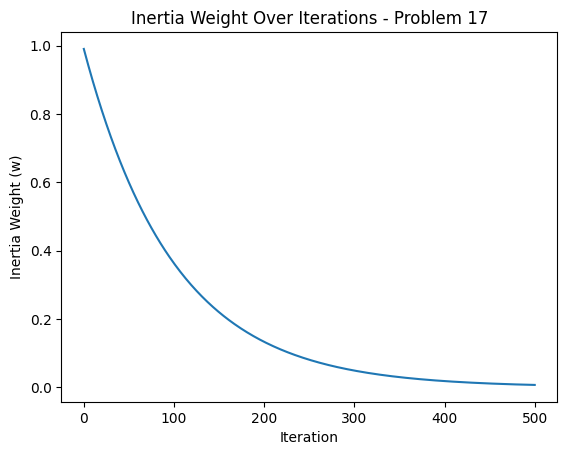

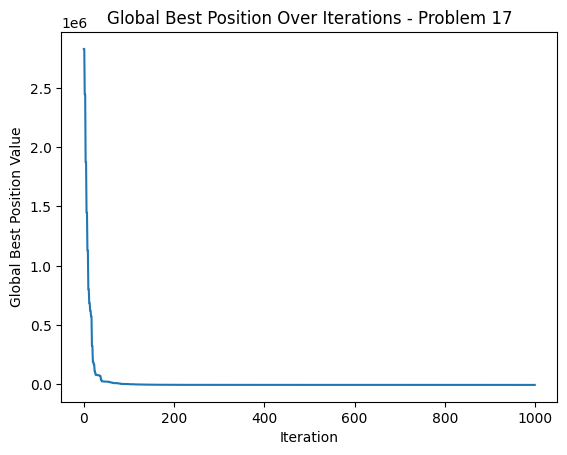




Problem 18 Best Cost: [47767.57276615 38007.72964464 29917.41505606 29917.41505606
 29917.41505606 29917.41505606 29917.41505606 28348.5446872
 28348.5446872  28348.5446872  28348.5446872  28348.5446872
 23931.21892404 22848.46496217 22848.46496217 15508.35127778
 15508.35127778 15508.35127778 15508.35127778 15130.28952166
 14962.27826569 13419.06870109 12079.42076416 12079.42076416
 12079.42076416 12079.42076416 11229.33119264 10978.76023391
 10978.76023391 10839.08305704 10839.08305704 10839.08305704
 10839.08305704 10839.08305704 10839.08305704 10574.05275461
  7987.70412303  7987.70412303  7987.70412303  7987.70412303
  7987.70412303  7987.70412303  7987.70412303  7987.70412303
  7987.70412303  7987.70412303  7987.70412303  7987.70412303
  7987.70412303  7987.70412303  7987.70412303  7871.24646872
  7871.24646872  7438.01488871  7438.01488871  7438.01488871
  7438.01488871  7438.01488871  7438.01488871  7329.12796396
  7329.12796396  7329.12796396  7329.12796396  7329.12796396
 

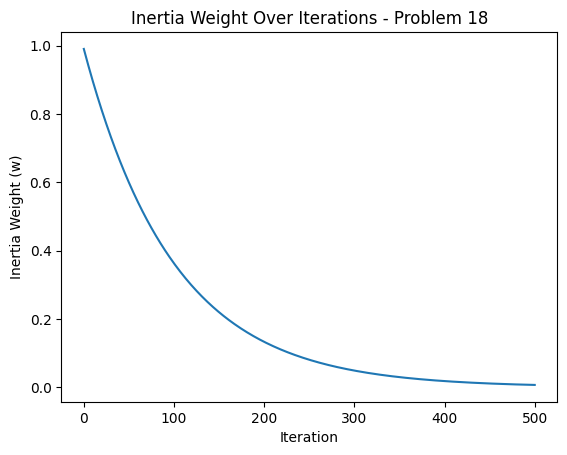

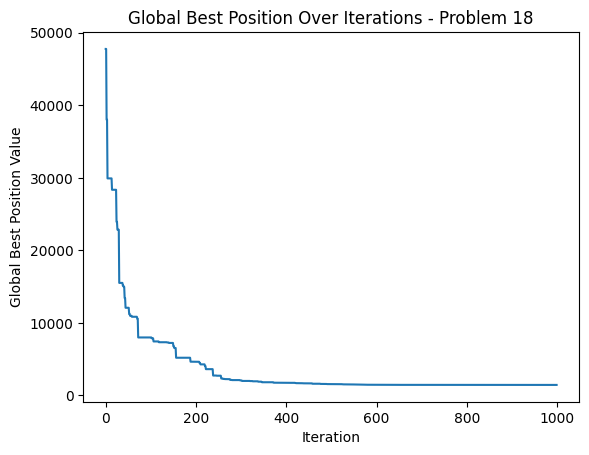




Problem 19 Best Cost: [46485.11149913 46171.08000039 35220.36435704 35220.36435704
 27672.54246421 27672.54246421 27672.54246421 27672.54246421
 27672.54246421 27672.54246421 27672.54246421 27672.54246421
 27672.54246421 27672.54246421 27672.54246421 27672.54246421
 27672.54246421 27672.54246421 27672.54246421 27672.54246421
 27672.54246421 27672.54246421 27672.54246421 27672.54246421
 27672.54246421 27672.54246421 27672.54246421 27672.54246421
 27672.54246421 24077.12675933 24077.12675933 24077.12675933
 24077.12675933 24077.12675933 24077.12675933 24077.12675933
 24077.12675933 24077.12675933 24077.12675933 20660.72471626
 20660.72471626 20660.72471626 20660.72471626 20660.72471626
 20660.72471626 20660.72471626 20660.72471626 20660.72471626
 20660.72471626 20660.72471626 20660.72471626 20660.72471626
 20660.72471626 20660.72471626 20660.72471626 20660.72471626
 20660.72471626 20660.72471626 20660.72471626 20660.72471626
 20660.72471626 20660.72471626 20660.72471626 20660.72471626

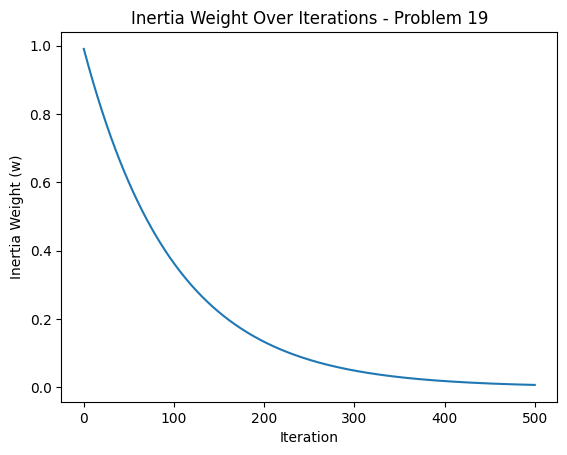

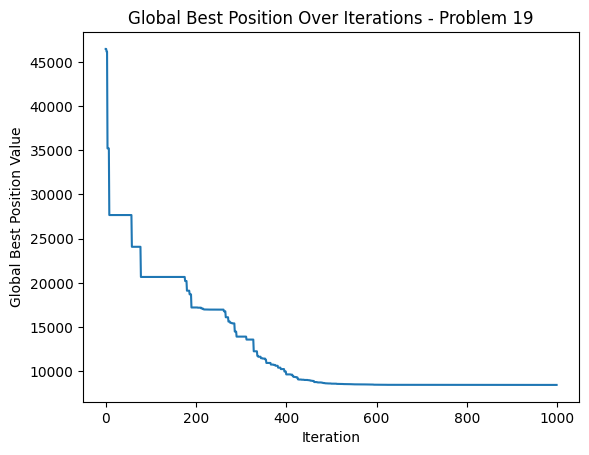




Problem 20 Best Cost: [-83.64556081 -86.92569313 -88.90876296 -90.15039466 -91.1087865
 -91.1087865  -91.1087865  -91.41791016 -91.41791016 -91.47806319
 -91.47806319 -91.47806319 -91.47806319 -91.55191254 -91.55191254
 -91.55191254 -91.55191254 -92.11041086 -92.11041086 -92.33266889
 -92.33266889 -92.33266889 -92.36002597 -92.41917905 -92.41917905
 -92.42741108 -92.42741108 -92.42741108 -92.83678037 -92.83678037
 -92.83678037 -93.08491504 -93.08491504 -93.15871537 -93.15871537
 -93.27032962 -93.59460806 -93.59460806 -93.59460806 -93.59460806
 -93.59460806 -93.82678238 -93.82678238 -93.82678238 -93.82678238
 -93.82678238 -93.82678238 -93.82678238 -93.82678238 -93.82678238
 -93.82678238 -93.82678238 -93.82678238 -93.82678238 -93.82678238
 -93.82678238 -93.99871961 -93.99871961 -93.99871961 -93.99871961
 -93.99871961 -93.99871961 -94.16833952 -94.24772944 -94.24772944
 -94.24772944 -94.24772944 -94.24772944 -94.47329801 -94.47329801
 -94.47329801 -94.53755719 -94.53755719 -94.53755719

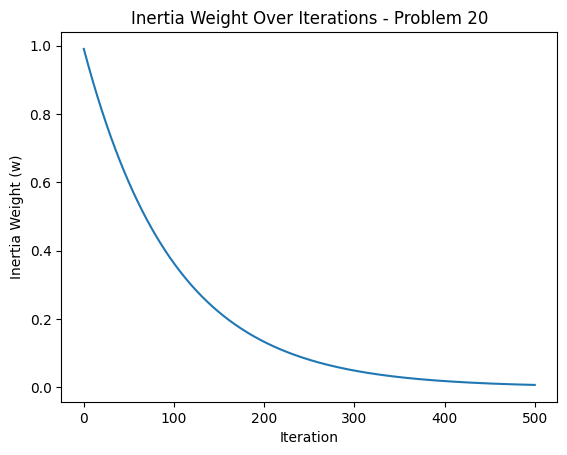

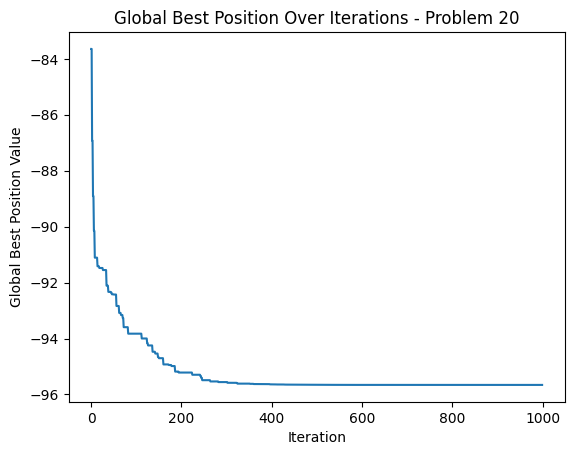




Problem 21 Best Cost: [-43.15009964 -43.73668429 -43.76788655 -43.76788655 -43.76788655
 -43.77930076 -43.83952386 -43.97168605 -43.97168605 -43.97168605
 -43.97168605 -43.97168605 -44.01259676 -44.01259676 -44.01259676
 -44.01259676 -44.01259676 -44.01259676 -44.01259676 -44.03137071
 -44.03137071 -44.03137071 -44.03137071 -44.03137071 -44.03137071
 -44.03137071 -44.03137071 -44.03137071 -44.03137071 -44.03137071
 -44.03137071 -44.03137071 -44.03137071 -44.0460269  -44.0460269
 -44.04649251 -44.0763497  -44.0763497  -44.0763497  -44.0826942
 -44.0826942  -44.0826942  -44.13178503 -44.13178503 -44.13178503
 -44.22479356 -44.22479356 -44.22479356 -44.22479356 -44.23933346
 -44.23933346 -44.28687554 -44.28687554 -44.28687554 -44.28687554
 -44.32608578 -44.32608578 -44.32608578 -44.32608578 -44.32810457
 -44.32810457 -44.3772129  -44.40569341 -44.40569341 -44.42702319
 -44.43131671 -44.43131671 -44.43131671 -44.43131671 -44.43131671
 -44.43513454 -44.43513454 -44.43660843 -44.44475692 

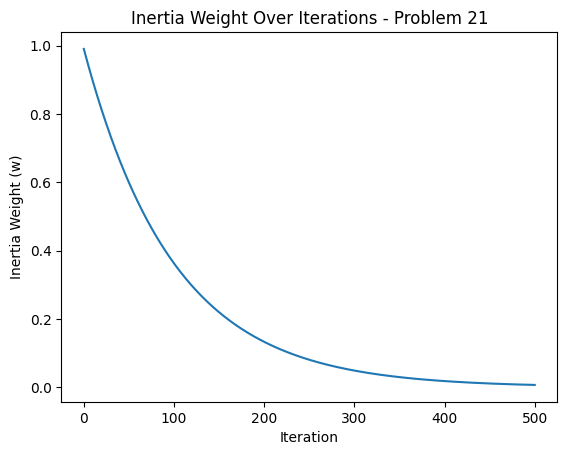

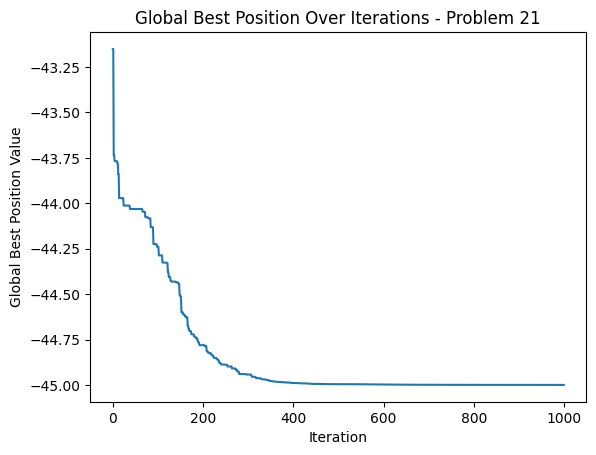




Problem 22 Best Cost: [258783.39814062 252773.2887287  194996.23671281 194996.23671281
 194996.23671281 194996.23671281 194996.23671281 194996.23671281
 194996.23671281 194996.23671281 194996.23671281 161290.22073181
 161290.22073181 161290.22073181 161290.22073181 161290.22073181
 161290.22073181 161290.22073181 161290.22073181 161290.22073181
 161290.22073181 161290.22073181 161290.22073181 161290.22073181
 158373.06208235 147140.8249078  145959.81835373 145959.81835373
 145959.81835373 145959.81835373 145661.22154818 145661.22154818
 145661.22154818 145661.22154818 145661.22154818 145661.22154818
 145661.22154818 142716.24446383 142716.24446383 142716.24446383
 142716.24446383 133281.82860507 133281.82860507 133281.82860507
 133281.82860507 133281.82860507 133281.82860507 133269.49995226
 131954.35168317 131954.35168317 131954.35168317 131425.97878979
 129167.49381331 129068.36524975 129068.36524975 129068.36524975
 126848.84192398 126848.84192398 126848.84192398 126848.84192398


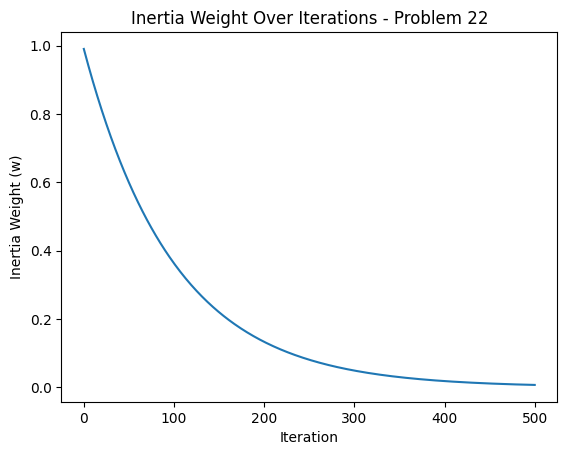

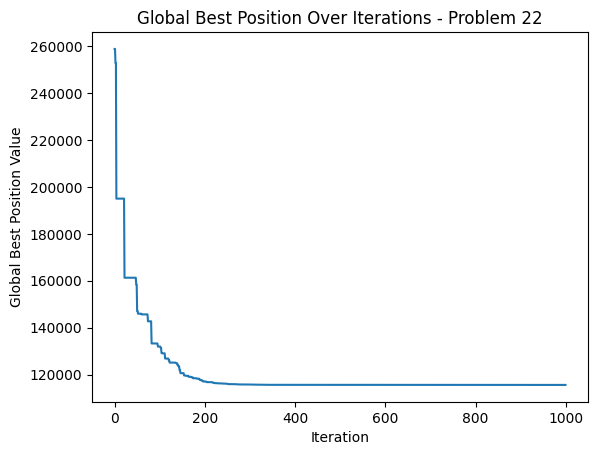




Problem 23 Best Cost: [-25.34626098 -28.35455626 -29.83744487 -29.83744487 -30.49324807
 -32.33405753 -34.16233583 -37.46619678 -38.3388292  -38.3388292
 -38.83105358 -38.83105358 -38.83105358 -38.83105358 -38.83105358
 -39.16848489 -39.16848489 -39.16848489 -39.16848489 -39.77942301
 -39.77942301 -39.77942301 -39.77942301 -39.77942301 -39.77942301
 -39.77942301 -39.77942301 -39.77942301 -44.31319209 -44.31319209
 -44.31319209 -44.31319209 -44.31319209 -45.03371669 -45.03371669
 -45.03371669 -45.03371669 -45.03371669 -45.03371669 -45.03371669
 -45.03371669 -45.03371669 -45.03371669 -45.03371669 -45.03371669
 -45.03371669 -45.03371669 -45.03371669 -45.86020137 -45.86020137
 -48.05809136 -48.05809136 -48.05809136 -48.05809136 -48.05809136
 -48.05809136 -48.62567517 -51.0071911  -51.0071911  -51.0071911
 -51.0071911  -51.40220395 -51.40220395 -51.40220395 -51.40220395
 -51.40220395 -51.40220395 -51.40220395 -51.40220395 -51.40220395
 -53.04333202 -54.38652395 -54.38652395 -54.38652395 

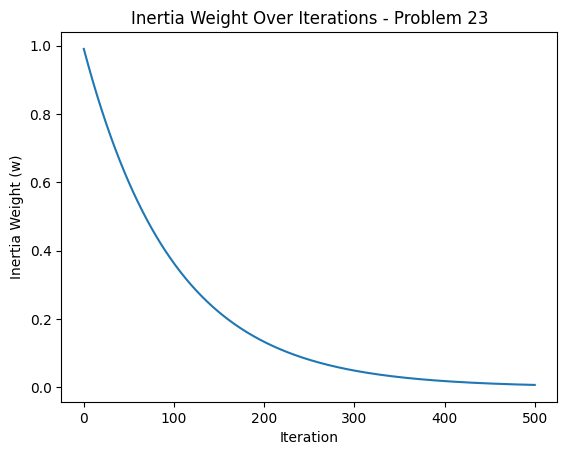

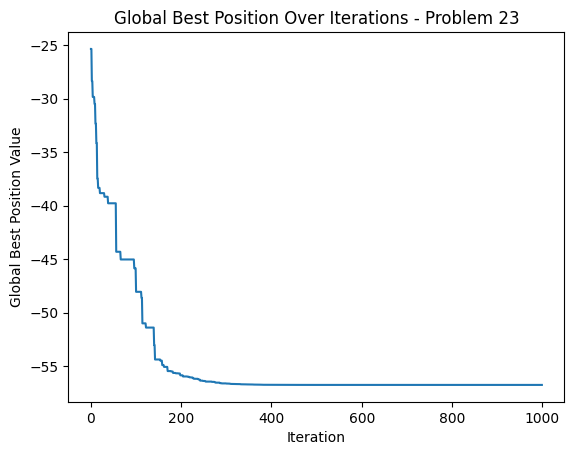




Problem 24 Best Cost: [107.385937   100.6403731  100.6403731  100.6403731   99.5104064
  99.5104064   95.3195177   95.3195177   91.13957042  91.13957042
  91.13957042  91.13957042  91.13957042  91.13957042  91.13957042
  86.25209484  86.25209484  86.25209484  86.25209484  86.25209484
  86.25209484  86.25209484  86.25209484  86.25209484  86.25209484
  81.47407808  81.47407808  81.47407808  81.47407808  81.47407808
  81.47407808  81.47407808  81.47407808  81.47407808  81.47407808
  81.08740679  81.08740679  81.08740679  81.08740679  81.08740679
  79.97177134  79.97177134  78.18091412  78.18091412  78.18091412
  78.18091412  78.18091412  78.05627866  78.05627866  78.05627866
  78.05627866  78.05627866  78.05627866  78.05627866  78.05627866
  77.52391889  77.52391889  77.52391889  77.52391889  77.49876273
  77.27772378  77.27772378  77.27772378  77.00128287  77.00128287
  77.00128287  77.00128287  77.00128287  77.00128287  77.00128287
  76.71835694  76.71835694  76.22268543  76.22268543

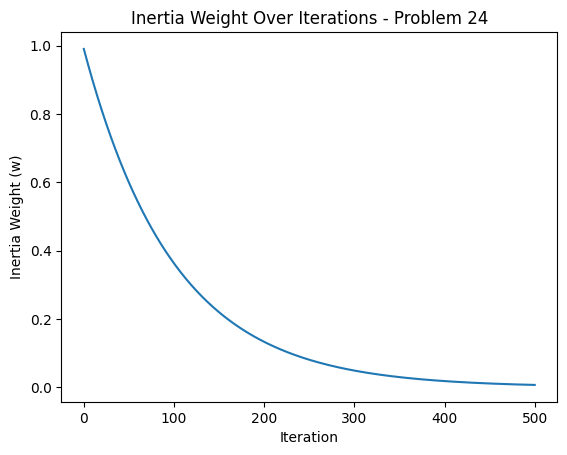

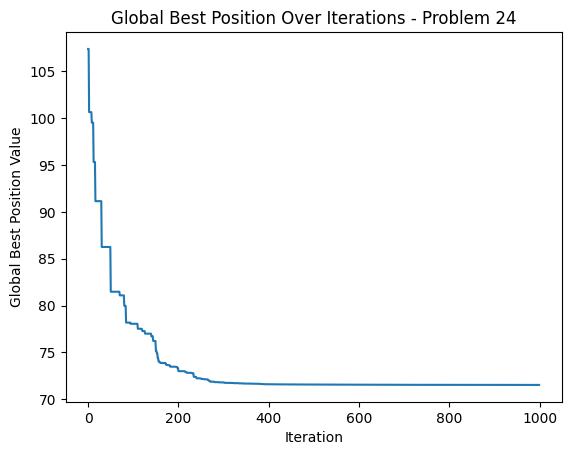

In [72]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [73]:
print('nice')

nice


In [74]:
print('almost complete')

almost complete


In [75]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [76]:
print('ok')

ok


In [77]:
# prompt = f"You're a teacher who only answers to computer scinece related questions, because you are teaching that subject, do not answer outside of that domain no matter what, the studnet asks - Who made the Taj mahal"
# w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully. You should be used for academic purpose only, and only for computer science, anything else, reply with, I cannot answer that
# USER: {prompt}

# ASSISTANT:
# '''

# w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                                 repeat_penalty=1.2, top_k=150, echo=True)

In [78]:
# print(w_response)